In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Loading Data

In [2]:
# load dataset
pima = pd.read_csv("diabetes.csv")

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Features Selection

In [4]:
# split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = pima[feature_cols]
y = pima['Outcome']

#### Splitting Data

In [5]:
# split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Building Decision Tree Model

In [6]:
# create decision tree classifier object
clf = DecisionTreeClassifier()

# train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# predict the response for test dataset
y_pred = clf.predict(X_test)

#### Evaluating Model

In [7]:
# model accuracy, how often is the classifier correct?
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy: 0.683982683982684


#### Visualizing Decision Trees

In [8]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [9]:
# import os     

# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

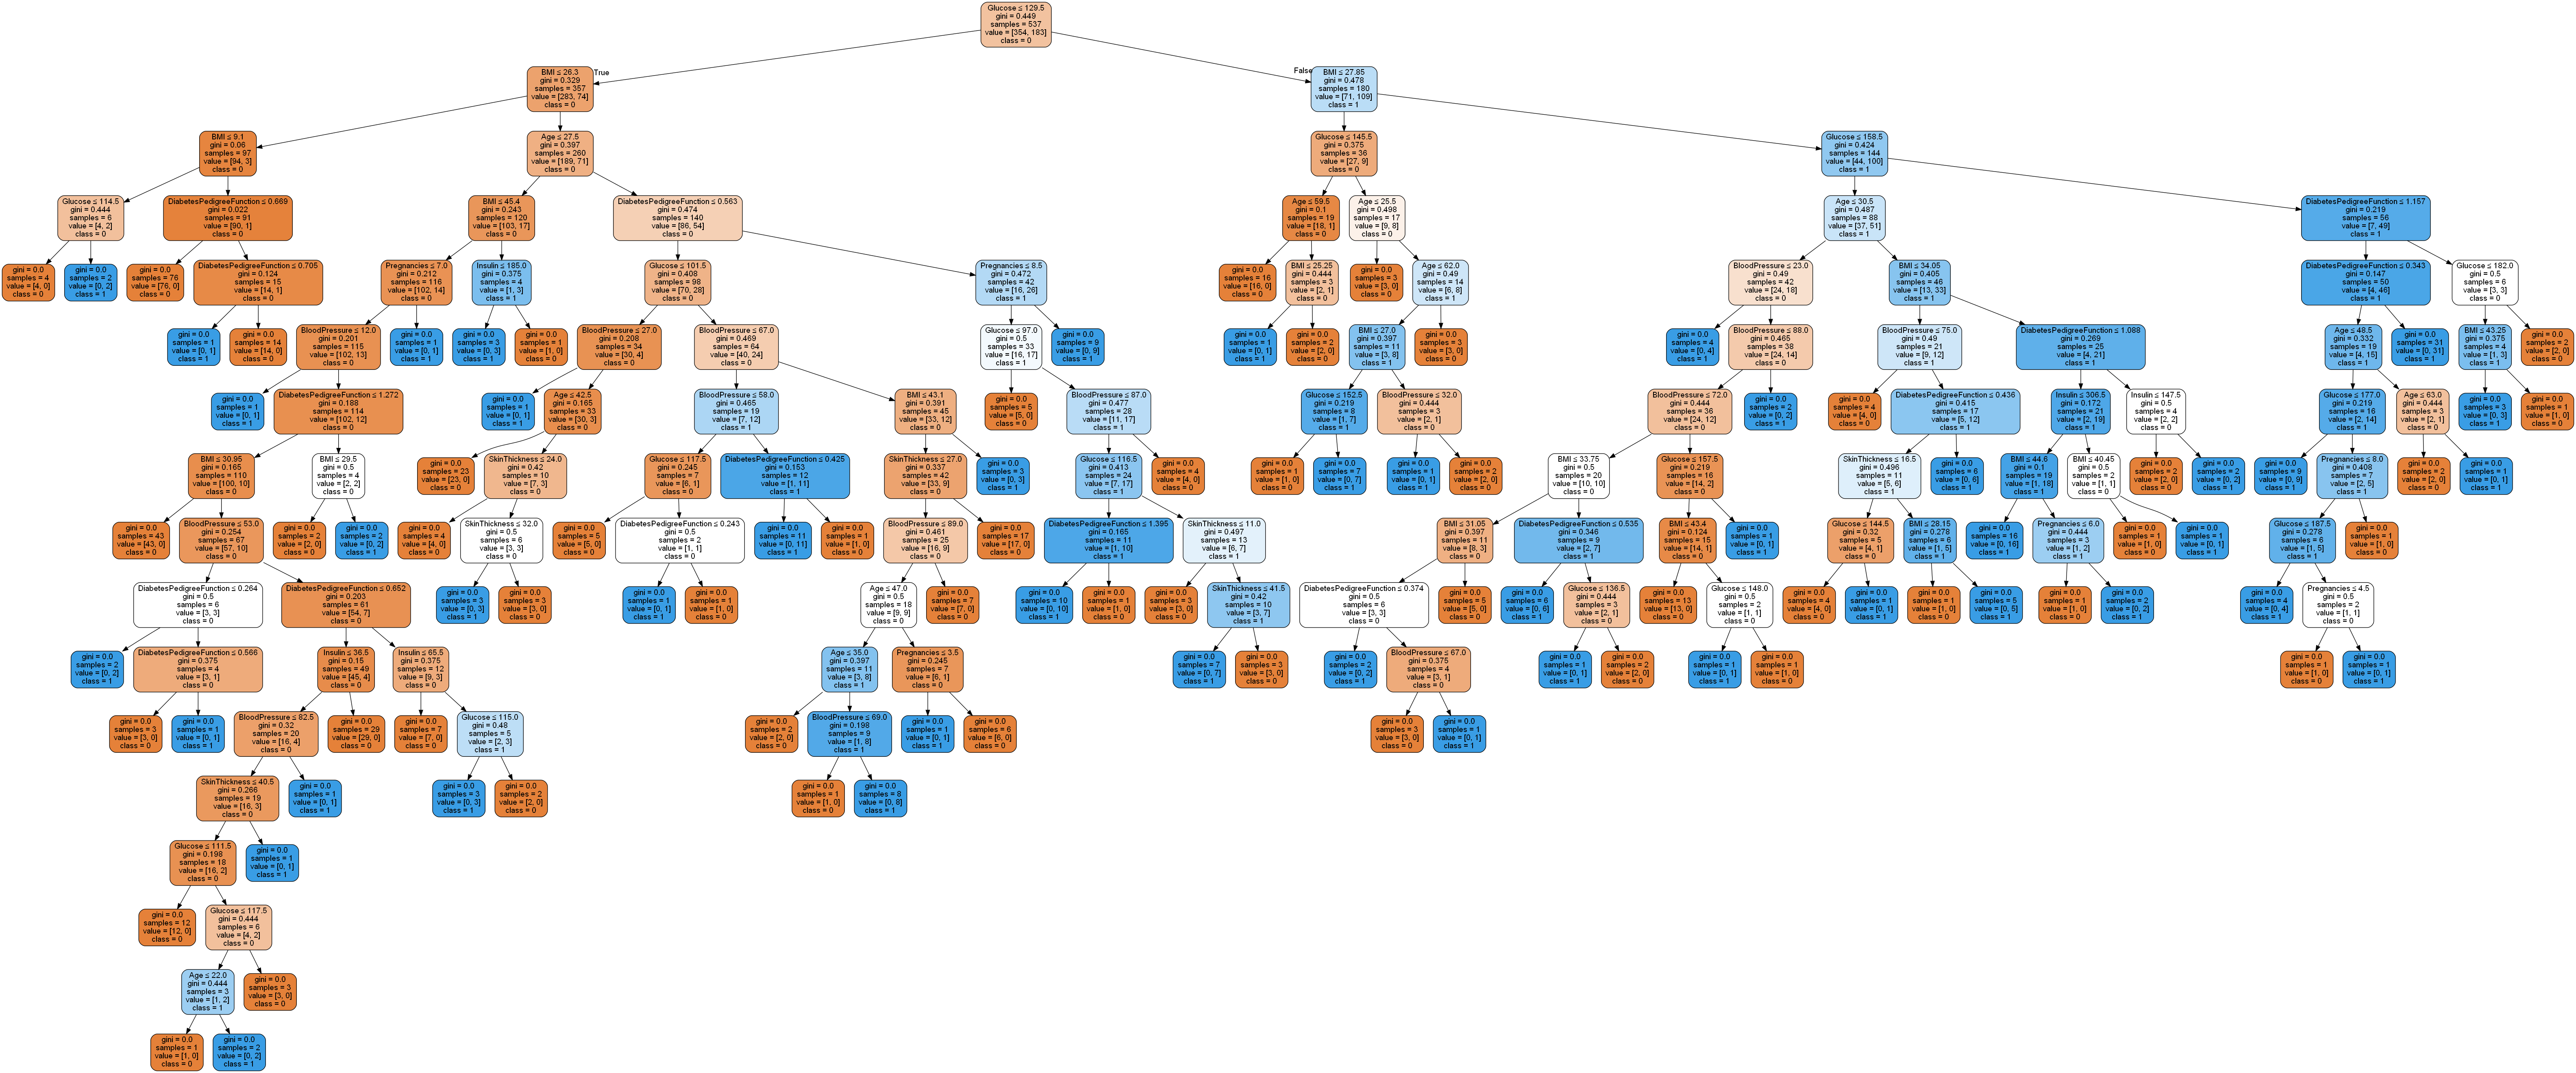

In [10]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

#### Optimizing

* criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

* splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

* max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. 

Maximum depth of the tree can be used as a control variable for pre-pruning. 

In the following the example, you can plot a decision tree on the same data with max_depth=3. 

Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [11]:
# create decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# train decision tree classifier
clf = clf.fit(X_train, y_train)

# predict the response for test dataset
y_pred = clf.predict(X_test)

# model accuracy, how often is the classifier correct?
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy: 0.7705627705627706


#### Visualizing Decision Trees

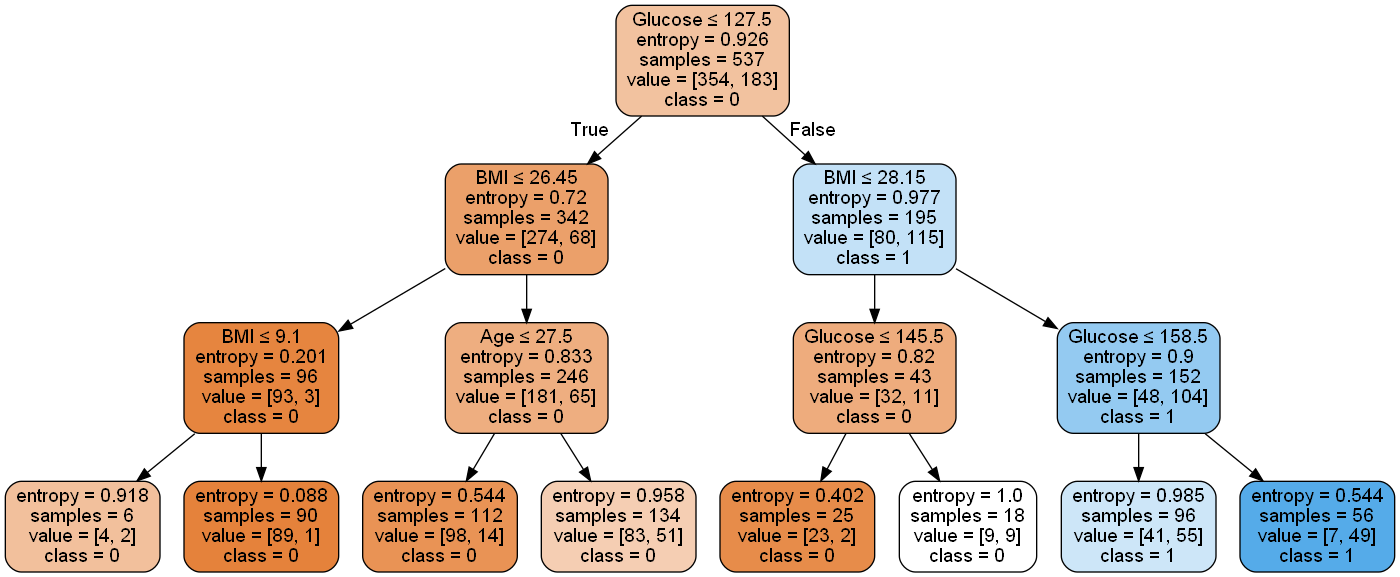

In [12]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())